# IN THE NSAME OF GOD

Afsaneh Sarboland - Ex2

# Start

At the begining we import the data and libraries is going to be used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [2]:
sales = pd.read_csv('D:\MS. AI\Books\Machine Learning\data\kc_house_data.csv', dtype=dtype_dict)
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [3]:
yi=sales['price']
xi=sales['sqft_living']

In this cell we calculate the mean of xi and yi:

In [4]:
sxi= sum(xi)
syi=sum(yi)
sxiyi=sum(xi*yi)
sxi2=sum(xi**2)
def mean_xi(sxi):
    n=len(xi)
    mean=sxi/float(n)
    return mean
def mean_yi(syi):
    n=len(yi)
    mean=syi/float(n)
    return mean
n=len(xi)
mxi=mean_xi(sxi) # The mean of xi
myi=mean_yi(syi) # The mean of yi

# Approach 1:

And after we calculated the mean of xi & yi, we define two function for slope and intercept of line that previously was explained in the .pdf file by using them here we have:

intercept: -43580.743094474776       slope: 280.6235678974486


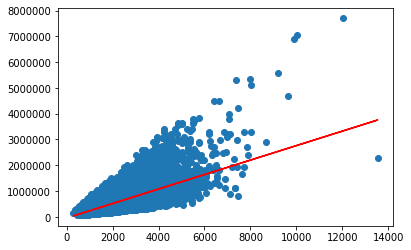

In [48]:
def slope_p():
    w1=sum((xi-mxi)*(yi-myi))/sum((xi-mxi)**2)
    return w1
w1_p=slope_p()
def intercept_p():
    w0=myi-w1_p*mxi
    return w0
w0_p=intercept_p()
print('intercept:',w0_p,'      slope:',w1_p)
plt.scatter(xi, yi) 
plt.plot(xi,(w0_p+w1_p*xi), color='red')
plt.show()

# Approach 2:

# Gradient Boosting:

Ultimately we use the approach 2 to calculate slope and intercept of line, according to the expressions were given in the pdf. file by using them we calculate the slope and intercept:

slope 263.15784437491186 intercept -52623.905025289074


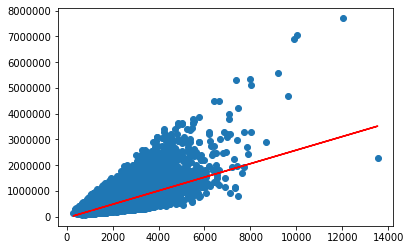

In [45]:
m =250 #slope
c =-100 #intercept

L =pow(10,5)  # The learning Rate
epochs = 500 # The number of iterations

n = float(len(xi)) # Number of elements in X

# Performing Gradient Descent 
for i in range(1,epochs): 
    Y_pred = m*xi + c  # The current predicted value of Y
    var=sum((yi-myi)**2)
    D_m=sum((myi-Y_pred)/var)
    D_c=sum((-1)*xi*((Y_pred-myi)/var))
    m = m + L * D_m  # Update m
    c = c + L * D_c  # Update c
    
print ('slope',m,'intercept',c)

Y_pred = m*xi + c
 
plt.scatter(xi, yi) 
plt.plot(xi,Y_pred, color='red')
plt.show()

# Creating different types of pdf:

0
21613


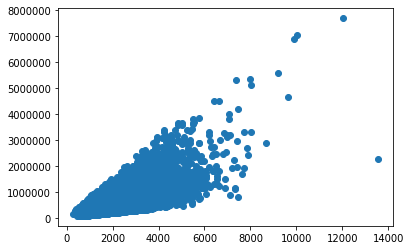

Minimum of sqft_living: 290
Maximum of sqft_living: 13540


In [7]:
num=len(yi)
n=0
px=[21613]
#n=[100]
plt.scatter(xi,yi)
plt.show()
min_xi=int(min(xi))
max_xi=int(max(xi))
print('Minimum of sqft_living:',min_xi)
print('Maximum of sqft_living:',max_xi)

In [46]:
for j in range(900,1000):
    for i in range (0,num):
        if j==xi[i]:
            n+=1
    if n>0:
    #pxy=n/num        
        print('The availabe houses in range 900-1000 sqft:',j,n)
        n=n-n

z=900
m=0
sqft_900=[]
price=[]
for k in range(0,num):
    if xi[k]==z:
        price.append(yi[k])
print('Minimum price for house with 900 sqft:',min(price),'    Maximum price for house with 900 sqft:',max(price))
price_900=[]
for i in range (0,int(len(price))):
    for f in range(83000,553000):
        if price[i]==f:
                m+=1
    if m > 0:
        pxyc=m/len(price) # Probability of p(y|x=900)
        price_900.append(pxyc)
        m=m-m

The availabe houses in range 900-1000 sqft: 900 21666.0
The availabe houses in range 900-1000 sqft: 901 1.0
The availabe houses in range 900-1000 sqft: 902 1.0
The availabe houses in range 900-1000 sqft: 910 60.0
The availabe houses in range 900-1000 sqft: 920 51.0
The availabe houses in range 900-1000 sqft: 930 43.0
The availabe houses in range 900-1000 sqft: 940 62.0
The availabe houses in range 900-1000 sqft: 950 46.0
The availabe houses in range 900-1000 sqft: 960 82.0
The availabe houses in range 900-1000 sqft: 962 1.0
The availabe houses in range 900-1000 sqft: 970 49.0
The availabe houses in range 900-1000 sqft: 980 53.0
The availabe houses in range 900-1000 sqft: 982 1.0
The availabe houses in range 900-1000 sqft: 988 1.0
The availabe houses in range 900-1000 sqft: 990 53.0
The availabe houses in range 900-1000 sqft: 998 2.0
Minimum price for house with 900 sqft: 83000.0     Maximum price for house with 900 sqft: 553000.0


Probability of house with 900 sq ft and different prices:

In [47]:
print(price_900)

[0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.0188679